In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import utils, os

%config InlineBackend.figure_format = 'svg'

In [2]:
settings = utils.load_settings()
cleaned_data_dir = settings["cleaned_data_dir"]
plots_dir = settings["plots_dir"]

In [3]:
df = pd.read_parquet(os.path.join(cleaned_data_dir, "cleaned_dataset.parquet"))
df.drop(columns=["Accession ID", "col_date", "sub_date"], inplace=True)

In [23]:
bases_counts = Counter(''.join(df['sequence'].astype(str).values))

In [24]:
df['length'] = df['sequence'].apply(len)

In [25]:
df.describe()

,col_date,date,length
count,42051,42051,42051.000000
mean,2021-06-25 13:59:37.912534528,2021-06-25 13:59:37.912534528,29690.211339
min,2020-01-01 00:00:00,2020-01-01 00:00:00,15430.000000
25%,2021-01-25 00:00:00,2021-01-25 00:00:00,29614.000000
50%,2021-06-29 00:00:00,2021-06-29 00:00:00,29726.000000
75%,2021-09-13 00:00:00,2021-09-13 00:00:00,29782.000000
max,2024-02-08 00:00:00,2024-02-08 00:00:00,29956.000000
std,NaN,NaN,229.760676


In [26]:
def plot_hist(seq, bins=100, title="", xlabel="", ylabel=""):
    fig, ax = plt.subplots()
    ax.hist(seq, bins=bins, color='skyblue', edgecolor='black')
    ax.set_title(title);
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

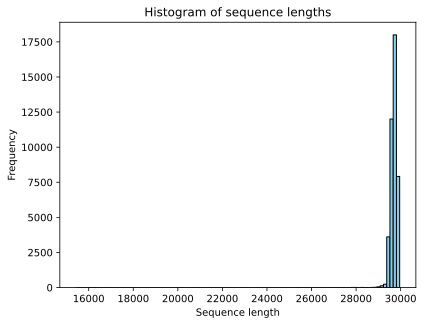

In [27]:
# Plot the histogram of the sequence lengths
plot_hist(
    df['length'], 
    bins=100, 
    title="Histogram of sequence lengths", 
    xlabel="Sequence length", 
    ylabel="Frequency"
)

In [28]:
def plot_base_frequency(sequences):
    bases = ['A', 'C', 'G', 'T', 'N', 'Y', 'R', 'W', 'S', 'K', 'M', 'B', 'D', 'H', 'V']
    base_counts = {base: 0 for base in bases}
    for seq in sequences:
        for base in seq.upper():
            if base in base_counts:
                base_counts[base] += 1

    total_bases = sum(base_counts.values())

    base_freqs = {base: count / total_bases for base, count in base_counts.items()}

    # Extract labels and data for plotting
    base_labels = list(base_freqs.keys())
    base_data = list(base_freqs.values())

    fig, ax = plt.subplots()
    ax.bar(base_labels, base_data, color='skyblue', edgecolor='black')
    ax.set_title("Frequency of Each Base");
    ax.set_xlabel("Base");
    ax.set_ylabel("Frequency");

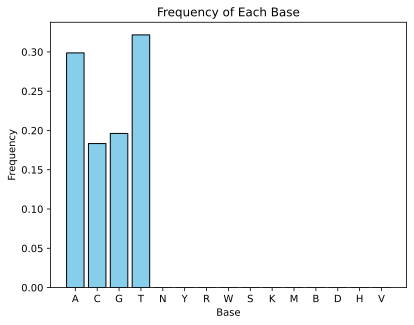

In [29]:
plot_base_frequency(df['sequence'])

In [30]:
def plot_label_distribution(sequences, labels):
    if len(sequences) != len(labels):
        raise ValueError("Number of sequences and labels must be equal.")

    # Count the occurrences of each label
    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

    # Extract labels and data for plotting
    label_names = list(label_counts.keys())
    label_data = list(label_counts.values())
    print(len(label_names))

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.bar(label_names, label_data, color='skyblue', edgecolor='black')
    ax.set_xticks(range(len(label_names)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title("Distribution of Labels");
    ax.set_xlabel("Label");
    ax.set_ylabel("Count");

586


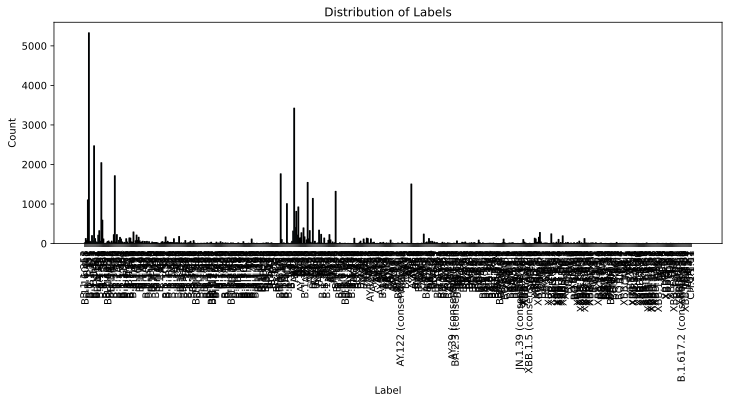

In [31]:
plot_label_distribution(df['sequence'], df['lineage'])

In [32]:
country_counts = Counter(df['country'])
country_counts = dict(sorted(country_counts.items(), key=lambda x: x[1], reverse=True))

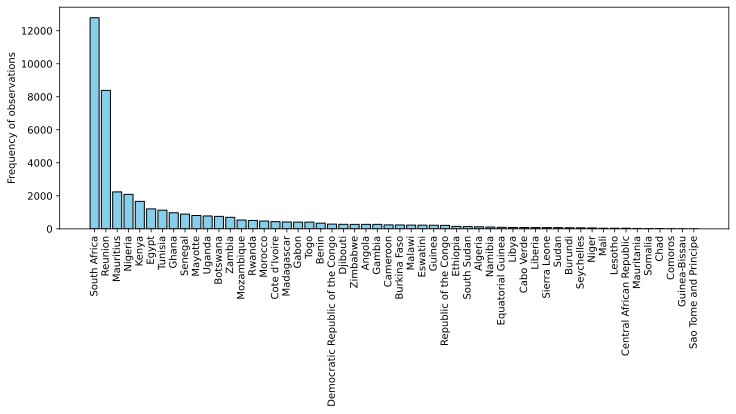

In [33]:
label_names = list(country_counts.keys())
label_data = list(country_counts.values())

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(label_names, label_data, color='skyblue', edgecolor='black')
ax.set_xticks(range(len(label_names)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# ax.set_title("Distribution of Labels");
# ax.set_xlabel("Label");
ax.set_ylabel("Frequency of observations");

In [34]:
plt.savefig(os.path.join(plots_dir, "country_distribution.png"), format='png', bbox_inches='tight', dpi=300)

<Figure size 640x480 with 0 Axes>

In [21]:
len(df)

42037

In [22]:
df['lineage'].value_counts()

lineage
B.1.351      5330
AY.45        3424
B.1.1.7      2471
B.1          2044
B.1.617.2    1763
             ... 
BA.1.1.14       1
B.59            1
BA.2.79.1       1
BF.5            1
BA.2.86         1
Name: count, Length: 580, dtype: int64

In [28]:
# Omicron lineages are "BA.2.86, XBB.1.9.1, XBB.1.9.2, XBB.2.3, XBB.1.16, XBB.1.5, CH.1.1, BA.2.74"
omicron = df['lineage'].str.contains("BA.2.86|XBB.1.9.1|XBB.1.9.2|XBB.2.3|XBB.1.16|XBB.1.5|CH.1.1|BA.2.74").sum()

# Alpha -> B.1.1.7 and Q lineages
alpha = df['lineage'].str.contains("B.1.1.7|Q").sum()

# Beta -> B.1.351 and descendents
beta = df['lineage'].str.contains("B.1.351").sum()

# Gamma -> P.1 and their descendents
gamma = df['lineage'].str.contains("P.1").sum()

# Delta -> B.1.617.2 and their descendants
delta = df['lineage'].str.contains("B.1.617.2").sum()

# Epsilon -> B.1.427 and B.1.429
epsilon = df['lineage'].str.contains("B.1.427|B.1.429").sum()

# Eta -> B.1.525
eta = df['lineage'].str.contains("B.1.525").sum()

# Iota -> B.1.526 
iota = df['lineage'].str.contains("B.1.526").sum()

# Kappa -> B.1.617.1
kappa = df['lineage'].str.contains("B.1.617.1").sum()

# N/A -> B.1.617.3
na = df['lineage'].str.contains("B.1.617.3").sum()

# Zeta -> P.2
zeta = df['lineage'].str.contains("P.2").sum()

# Mu -> B.1.621, B.1.621.1 
mu = df['lineage'].str.contains("B.1.621|B.1.621.1").sum()

# Lineages not in the above categories


print(f"Omicron: {omicron}")
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")
print(f"Gamma: {gamma}")
print(f"Delta: {delta}")
print(f"Epsilon: {epsilon}")
print(f"Eta: {eta}")
print(f"Iota: {iota}")
print(f"Kappa: {kappa}")
print(f"N/A: {na}")
print(f"Zeta: {zeta}")
print(f"Mu: {mu}")

print(f"Total: {omicron + alpha + beta + gamma + delta + epsilon + eta + iota + kappa + na + zeta + mu}")

Omicron: 1455
Alpha: 2879
Beta: 7049
Gamma: 1
Delta: 1763
Epsilon: 2
Eta: 591
Iota: 1
Kappa: 5
N/A: 4
Zeta: 3
Mu: 2
Total: 13755


In [32]:
counts_df = pd.DataFrame(df['lineage'].value_counts().sort_values(ascending=False))

In [38]:
counts_df.head(80)

,count
lineage,
B.1.351,5330
AY.45,3424
B.1.1.7,2471
B.1,2044
B.1.617.2,1763
...,...
R.1,74
B.1.1.57,73
L.3,70


In [ ]:
"Omicron" "BA.2.86"
"Omicron" "XBB.1.9.1"
"Omicron" "XBB.1.9.2" 
"Omicron" "XBB.2.3"
"Omicron" "XBB.1.16"
"Omicron" "XBB.1.5"
"Omicron" "CH.1.1"
"Omicron" "BA.2.74"
"Alpha" "B.1.1.7 and Q lineages"
"Beta" "B.1.351 and descendent lineages"
"Gamma" "P.1 and descendent lineages"
"Delta" "B.1.617.2 and descendant lineages"
"Epsilon" "B.1.427 and B.1.429"
"Eta" "B.1.525" 
"Iota" "B.1.526" 
"Kappa" "B.1.617.1"
"N/A" "B.1.617.3"
"Zeta" "P.2"
"Mu" "B.1.621, B.1.621.1" 